In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from PIL import Image, ImageOps

In [3]:
#%matplotlib qt

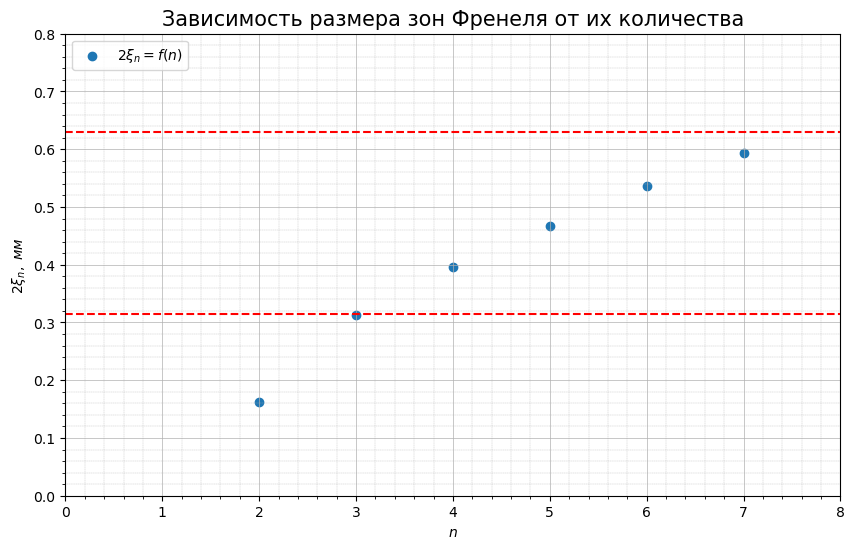

In [4]:
data = pd.read_excel('4.3.1.xlsx', sheet_name='А')
names = list(data)

n = data[names[3]][1:]
ksi_n = data[names[4]][1:] * 2

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.scatter(n, ksi_n, label=r"$2\xi_n = f(n)$", marker='o')

b = 0.315
ax.hlines([b, 2*b], 0, 8, colors='r', linestyles='dashed')

ax.legend(loc='upper left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([0, 8, 0, 0.8])

ax.set_title(r"Зависимость размера зон Френеля от их количества", loc='center', fontsize=15)
ax.set_xlabel(r"$n$", loc='center', fontsize=10)
ax.set_ylabel(r"$2\xi_n,\; мм$", loc='center', fontsize=10)

plt.show()

fig.savefig("4.3.1_1.png", dpi=500)


In [5]:
def func(x, k):
    return k * x

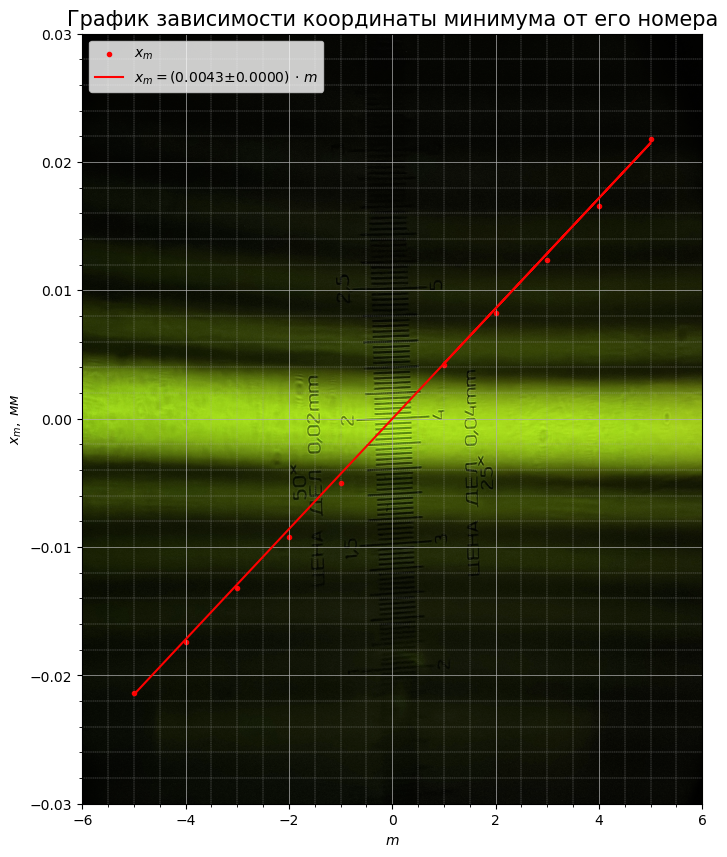

In [9]:
data = pd.read_excel('4.3.1.xlsx', sheet_name='Б')
names = list(data)

m = data[names[0]][1:]
x_m = data[names[2]][1:]

k, cov = curve_fit(func, m, x_m)
x_p = func(m, k)

fig, ax = plt.subplots(figsize=(8, 10), dpi=100)

img = Image.open("dif.png")
img = ImageOps.exif_transpose(img)
ax.imshow(img, aspect='auto', extent=[-6, 6, -0.032, 0.03])
ax.scatter(m, x_m, color='r', label=r"$x_m$", marker='.')
ax.plot(m, x_p,  color='r', label=r"$x_m = $" + r"({:.4f}$\pm${:.4f})".format(k[0], np.sqrt(cov[0][0])) + r"$\,\cdot\, m$")

ax.legend(loc='upper left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([-6, 6, -0.03, 0.03])

ax.set_title(r"График зависимости координаты минимума от его номера", loc='center', fontsize=15)
ax.set_xlabel(r"$m$", loc='center', fontsize=10)
ax.set_ylabel(r"$x_m,\; мм$", loc='center', fontsize=10)

plt.show()

fig.savefig("4.3.1_2.png", dpi=500)
